In [1]:
# 三、线性回归

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 加载数据
X_train = np.linspace(0, 1, 100)
Y_train = X_train * 2 + np.random.randn(*X_train.shape) * 0.3 + 10

# 设置超参数
learning_rate = 0.01
count = 300
cost = []

In [4]:
# 1.定义神经网络的结构和前向传播的输出结果
w = tf.Variable(0.0, name='weight')
b = tf.Variable(0.0, name='bias')
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

In [5]:
# 2.定义损失函数以及选择反向传播优化的算法
# loss = (Y - (w * X + b)) ** 2    # 一个样本的损失
loss = tf.reduce_mean((Y - (w * X + b)) ** 2)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [6]:
# 3.生成会话并且在训练数据上反复运行反向传播优化算法
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(count):
        _, w_value, b_value = sess.run([train_step, w, b], feed_dict={X:X_train, Y:Y_train})
        cost.append(sess.run(loss, feed_dict={X:X_train, Y:Y_train}))

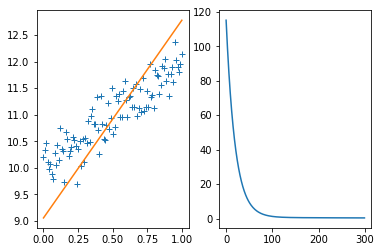

In [7]:
# 绘图
plt.subplot(1,2,1)
plt.plot(X_train, Y_train, '+')
plt.plot(X_train, X_train.dot(w_value) + b_value)
plt.subplot(1,2,2)
plt.plot([x for x in range(count)], cost)
plt.show()